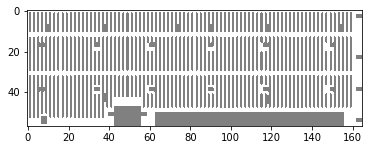

In [6]:
import pandas as pd

import numpy as np
from matplotlib import pyplot
from matplotlib import colors
import pickle

import random

map_SPF = np.ones((57, 165))

for i in range(map_SPF.shape[1]):
    if (i % 2) == 0:
        map_SPF[:, i] = 0

map_SPF[0, :] = 0  # Fila 0 vacia
map_SPF[11:13, :] = 0  # Fila gruesa vacia
map_SPF[30:32, :] = 0  # Fila gruesa vacia
map_SPF[:, 160:165] = 0  # Columna gruesa final vacia
map_SPF[53:57, 0:38] = 0  # Zona inferior izquierda vacia
map_SPF[48:57, 38:42] = 0  #
map_SPF[43:47, 42:57] = 0  #
map_SPF[47:57, 43:55] = 1  # Hueco ocupado "exterior"
map_SPF[48:57, 56:63] = 0  #
map_SPF[48:50, 63:156] = 0  # Filas que separan la zona de recogida vacias
map_SPF[48:57, 156:164] = 0  #
map_SPF[50:57, 63:156] = 1  # Zona de recogida ocupada
map_SPF[51, 7:10] = 0  # Hueco encima de una escalera
# Huecos intercalados:
map_SPF[16:20, 32:37] = 0  # Hueco a
map_SPF[16:20, 58:63] = 0  # Hueco b
map_SPF[16:20, 88:93] = 0  # Hueco e
map_SPF[16:20, 114:119] = 0  # Hueco g
map_SPF[16:20, 146:151] = 0  # Hueco i
map_SPF[37:41, 32:37] = 0  # Hueco d
map_SPF[37:41, 58:63] = 0  # Hueco c
map_SPF[37:41, 88:93] = 0  # Hueco f
map_SPF[37:41, 114:119] = 0  # Hueco h
map_SPF[37:41, 146:151] = 0  # Hueco j
# Escaleras:
map_SPF[7:11, 10:12] = 1  #
map_SPF[7:11, 38:40] = 1  #
map_SPF[7:11, 74:76] = 1  #
map_SPF[7:11, 90:92] = 1  #
map_SPF[7:11, 118:120] = 1  #
map_SPF[7:11, 154:156] = 1  #
map_SPF[52:56, 7:10] = 1  #
map_SPF[41:45, 38:40] = 1  #
map_SPF[42:46, 118] = 1  #
# Cuadrados azules derecha:
map_SPF[2:4, 162:165] = 1  #
map_SPF[22:24, 162:165] = 1  #
map_SPF[38:40, 162:165] = 1  #
map_SPF[53:55, 162:165] = 1  #
# Cuadrados azules abajo:
map_SPF[50:52, 40:43] = 1  #
map_SPF[50:52, 56:59] = 1  #
# Columnas verdes:
map_SPF[16:18, 6:9] = 1
map_SPF[16:18, 33:36] = 1
map_SPF[16:18, 60:63] = 1  #
map_SPF[16:18, 89:92] = 1  #
map_SPF[16:18, 116:119] = 1  #
map_SPF[16:18, 149:152] = 1  #
map_SPF[38:40, 6:9] = 1  #
map_SPF[38:40, 33:36] = 1  #
map_SPF[38:40, 60:63] = 1  #
map_SPF[38:40, 89:92] = 1  #
map_SPF[38:40, 116:119] = 1  #
map_SPF[38:40, 149:152] = 1  #

list_SPF = map_SPF.tolist()

# Escritura en modo binario, vacía el fichero si existe
fichero = open("mapaTarancon_P1.pckl", "wb")

# Escribe la colección en el fichero
pickle.dump(list_SPF, fichero)

fichero.close()

colormap = colors.ListedColormap(["white", "grey"])
# entregando este problema a
pyplot.imshow(list_SPF, cmap=colormap)
pyplot.show()

In [7]:
def generar_pedidos():

    y = 0

    # y es el valor que establece si el vector es correcto o no 
    # 0: incorrecto, 1: Correcto

    while y == 0:

        num1 = random.randint(1, 55) # Valor random del eje y
        num2 = random.randint(1, 158) # Valor random del eje x

        x = 0 
        
        """x es el número de "0" que hay en las 9 posiciones contiguas a la
        selección. Si hay 4 o menos "0", la selección será válida
        (ya que no está en los pasillos). Si hay más de 4 "0" significa que
        está en un pasillo u otro espacio en el que no hay estantería"""

        # Comprueba las 9 casillas contiguas en las que hay "0"

        if map_SPF[num1 + 1, num2] == 0:
            x = x + 1

        if map_SPF[num1 + 1, num2 + 1] == 0:
            x = x + 1

        if map_SPF[num1, num2 + 1] == 0:
            x = x + 1

        if map_SPF[num1 - 1, num2 + 1] == 0:
            x = x + 1

        if map_SPF[num1 - 1, num2] == 0:
            x = x + 1

        if map_SPF[num1 - 1, num2 - 1] == 0:
            x = x + 1

        if map_SPF[num1, num2 - 1] == 0:
            x = x + 1

        # Comprueba que la posición está libre y hay 4 o menos casillas con "0"
        if x <= 4 and map_SPF[num1, num2] == 0:
            y = 1
            vector = np.array([num1, num2])

        # Caso en el que la selección no es válida
        if x > 4 or map_SPF[num1, num2] == 1:
            y = 0

        print("Vector [",num1, ",",num2,"]")
        print("Valor Matriz: ", map_SPF[num1, num2])

    return num2, num1



Vector [ 5 , 152 ]
Valor Matriz:  0.0
Vector Final: 152 5
